In [2]:
from cvxopt import matrix,solvers
from numpy import array
import numpy as np
import networkx as nx

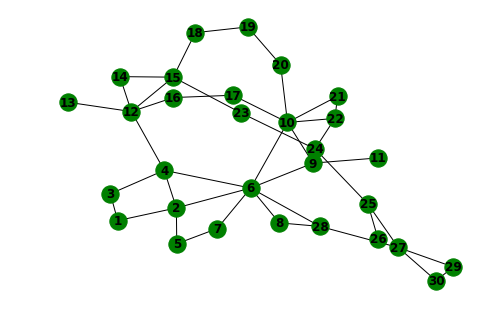

In [17]:
# networks Set up 
# Network Edges:
edges = [(1, 2), (1, 3), (2, 5), (2, 6), (2, 4), (3, 4), (4, 6), (4, 12), (5, 7), (6, 7), (6, 8), (6, 9), (6, 10), (6, 28),
         (8, 28), (9, 10), (9, 11), (10, 17), (10, 20), (10, 21), (10, 22), (12, 13), (12, 14), (12, 15), (12, 16),
         (14, 15), (15, 18), (15, 23), (16, 17), (18, 19), (19,20), (21, 22), (22, 24), (23, 24), (24, 25),(25, 26), (25, 27), (27, 28), (27, 29), (27, 30), (29, 30)]

# Create Graph Object
G = nx.Graph(edges)
totalEdges = len(edges)
# See graph
nx.draw(G, node_color='g', edge_color='k', with_labels=True, font_weight='bold')
# let's say we are getting from node 26 to node 5
sourceNode = 26; 
sinkNode = 5;


In [18]:
# Generate routes matrix
routes =  list(nx.all_simple_paths(G, source=sourceNode, target=sinkNode));
RouteMat = np.zeros((G.number_of_edges(), len(routes)));
for route in range(0,len(routes)):
    curRoute = routes[route];
    #print(curRoute);
    for edge in range(0,len(curRoute)):
        RouteMat[curRoute[edge],route]= 1;


In [19]:
# Define Latency Function
A = np.diag(np.linspace(1,totalEdges,num = totalEdges));
b = np.linspace(totalEdges,1,num = totalEdges)

In [21]:
P = A;
q = -b;
GMat = RouteMat;
h = np.zeros((totalEdges,1));
A = np.ones((1,len(routes)));
b = 1;
dims = {'l': G.number_of_edges(), 'q': [G.number_of_edges()+1], 's':[]}
x = solvers.coneqp(P,q, GMat, h, A,b)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()